# JOBS AND SALARIES IN DATA SCIENCE

work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('jobs.csv')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.shape

(9355, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe().astype(int)

,work_year,salary,salary_in_usd
count,9355,9355,9355
mean,2022,149927,150299
std,0,63608,63177
min,2020,14000,15000
25%,2023,105200,105700
50%,2023,143860,143000
75%,2023,187000,186723
max,2023,450000,450000


In [8]:
unique_job_titles = df['job_title'].nunique()
unique_job_titles

125

In [9]:
df.duplicated().sum()

4014

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


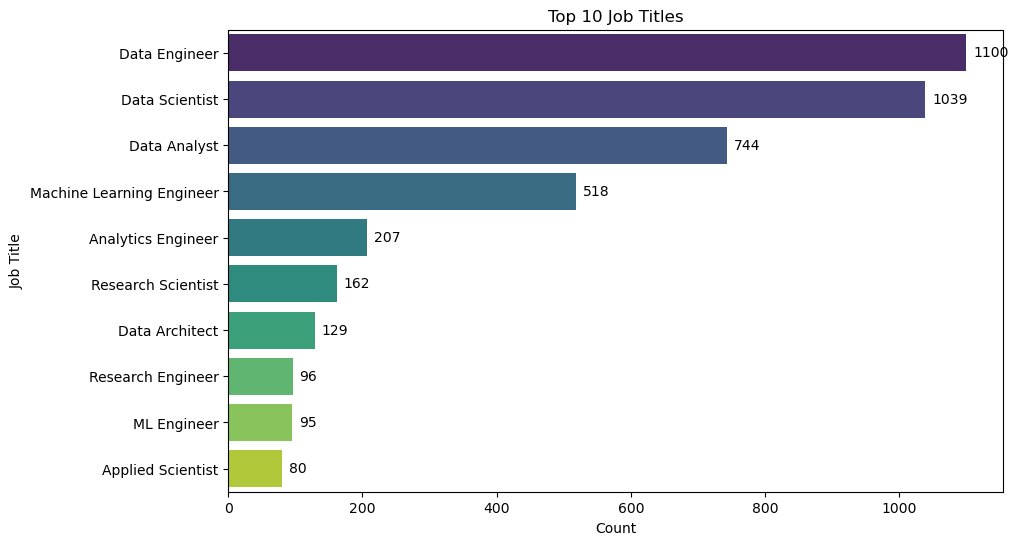

In [12]:
# Calculate the top 10 most common job titles
top_job_titles = df['job_title'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y=top_job_titles.index, x=top_job_titles.values, palette='viridis')
for i in range(top_job_titles.shape[0]):
    barplot.text(top_job_titles[i] + 10, i, top_job_titles[i], va='center')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Display the plot
plt.show()

Top 10 Job Titles in the Data Science Field

Salary Statistics for Various Data Science Roles

In [13]:
# Define a dictionary for job roles and their corresponding salarie
job_roles = {
    'Data Engineer': 'Data Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Analytics Engineer': 'Analytics Engineer'}


# Iterate over the job roles and calculate the highest, lowest, and average salaries
for role, title in job_roles.items():
    salaries = df[df['job_title'] == title]['salary_in_usd']
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Print the salary summary for each role
    print(role + ':')
    print('  - Highest Salary:', max_salary)
    print('  - Lowest Salary:', min_salary)
    print('  - Average Salary:', avg_salary)
    print()


Data Engineer:
  - Highest Salary: 385000
  - Lowest Salary: 18000
  - Average Salary: 143571

Data Scientist:
  - Highest Salary: 412000
  - Lowest Salary: 16000
  - Average Salary: 150533

Data Analyst:
  - Highest Salary: 430967
  - Lowest Salary: 15000
  - Average Salary: 108843

Machine Learning Engineer:
  - Highest Salary: 392000
  - Lowest Salary: 20000
  - Average Salary: 176558

Analytics Engineer:
  - Highest Salary: 430640
  - Lowest Salary: 37573
  - Average Salary: 153492



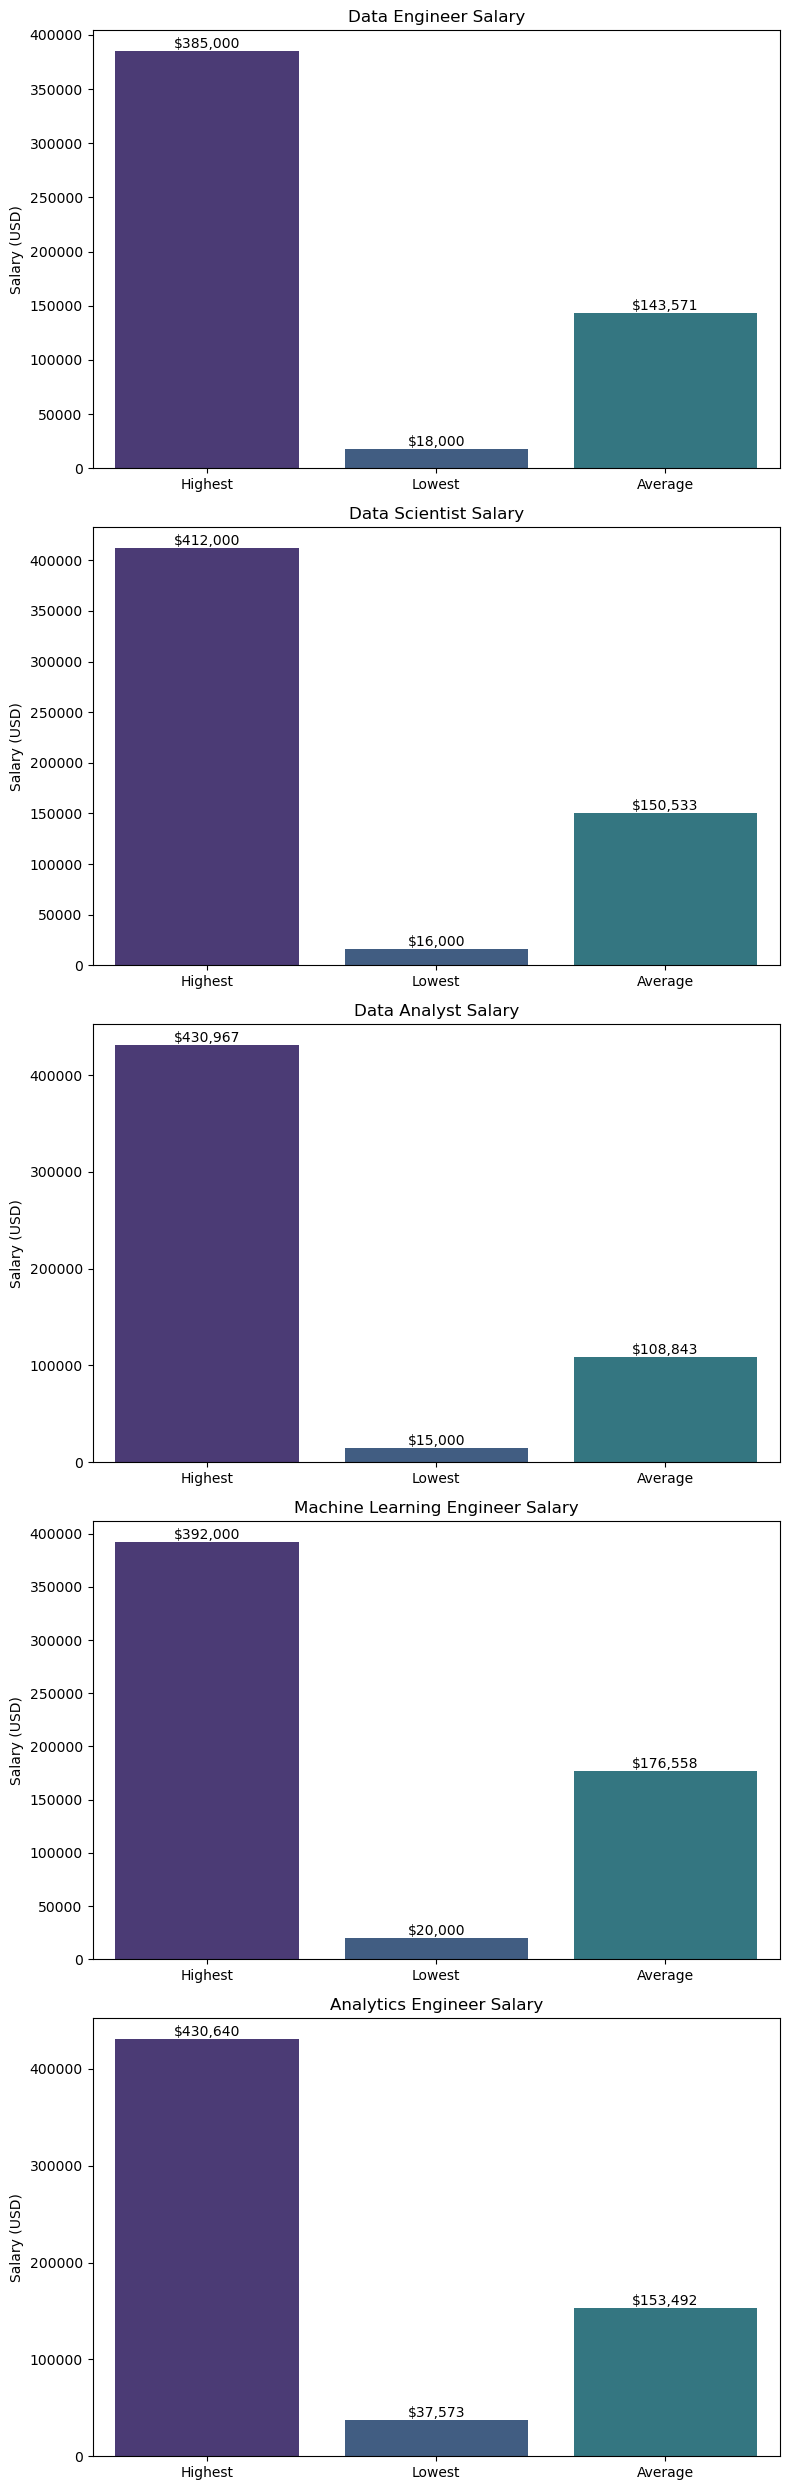

In [14]:
# Define the job role
job_roles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# Set the seaborn palette
sns.set_palette("viridis")

# Create a grid of subplots for job roles' salary summary
fig, axs = plt.subplots(len(job_roles), 1, figsize=(8, 5 * len(job_roles)))

# Iterate over job roles
for i, role in enumerate(job_roles):
    # Filter the dataset for the specific job role
    salaries = df[df['job_title'] == role]['salary_in_usd']
    
    # Calculate the highest, lowest, and average salaries
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    # Plot the salary summary
    sns.barplot(x=['Highest', 'Lowest', 'Average'], y=[max_salary, min_salary, avg_salary], ax=axs[i])
    axs[i].set_title(f'{role} Salary')
    axs[i].set_ylabel('Salary (USD)')
    
    # Add value labels to the bars
    for j, value in enumerate([max_salary, min_salary, avg_salary]):
        axs[i].text(j, value, f'${value:,}', ha='center', va='bottom')

# Adjust spacing between subplots and remove any excess blank space
plt.tight_layout()

# Show the plot
plt.show()

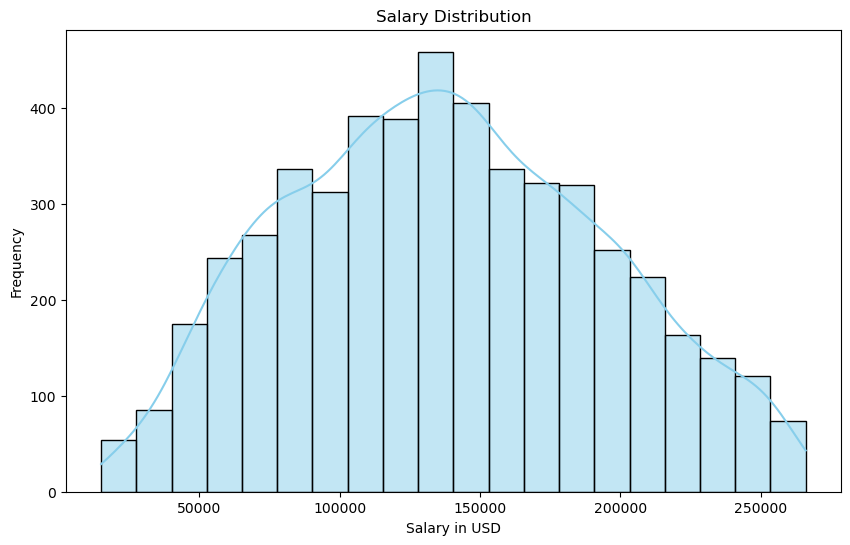

In [15]:
# Salary distribution
plt.figure(figsize=(10, 6))  # Create a new figure for the plot with a specific size of 10 inches in width and 6 inches in height
sns.histplot(df[df['salary_in_usd'] < df['salary_in_usd'].quantile(0.95)], x='salary_in_usd', bins=20, kde=True, color='skyblue')  # Generate a histogram plot using seaborn, restricting the data to values below the 95th percentile of 'salary_in_usd' column, with 20 bins, including a kernel density estimate, and setting the color to 'skyblue'
plt.title('Salary Distribution')  # Add a title to the plot as 'Salary Distribution'
plt.xlabel('Salary in USD')  # Label the x-axis as 'Salary in USD'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.show()  # Display the plot

This code creates a histogram of the 'salary_in_usd' column, but only includes salaries below the 95th percentile to exclude outliers.

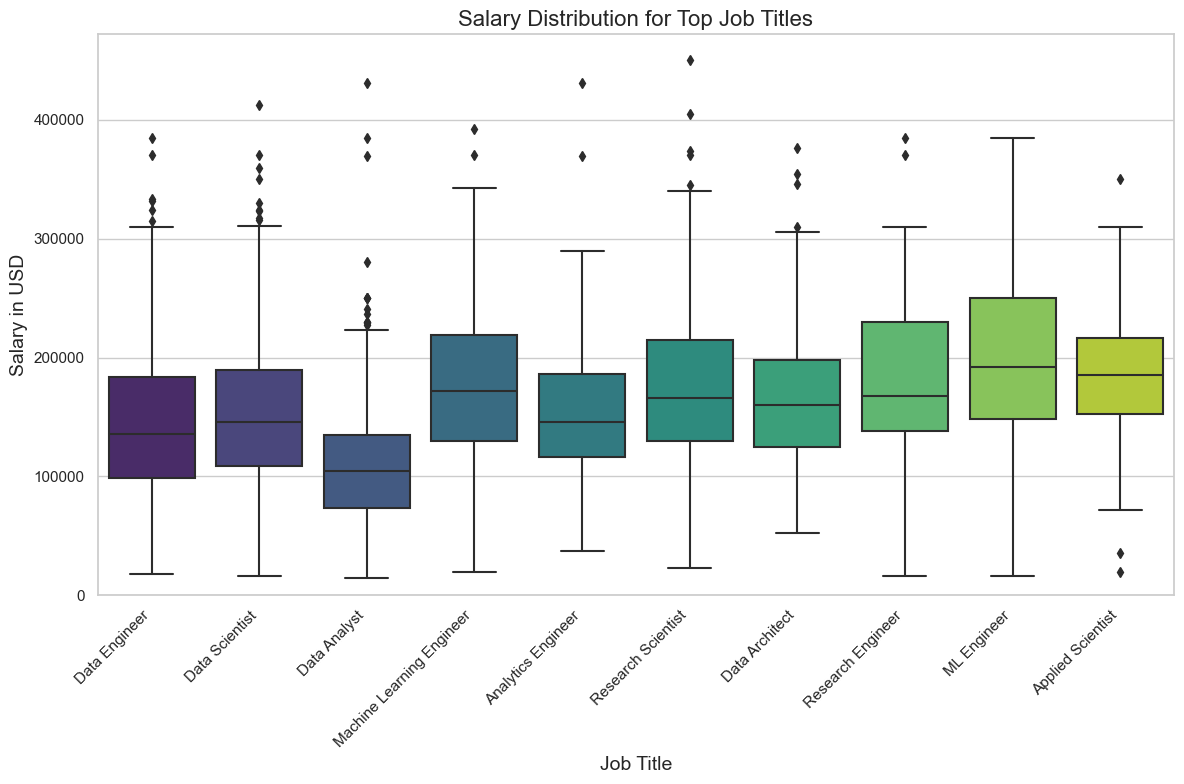

In [15]:
# Subset the data for the most frequent job title
top_job_titles = df['job_title'].value_counts().nlargest(10).index
subset_df = df[df['job_title'].isin(top_job_titles)]

# Set the figure size and adjust spacing
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

# Create the box plot
sns.boxplot(data=subset_df, x='job_title', y='salary_in_usd', order=top_job_titles, palette='viridis')

# Set plot title and labels
plt.title('Salary Distribution for Top Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust y-axis limits for better visualization of outliers
plt.ylim(bottom=0)

# Add more space between plots
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Replace specific values in the 'employment_type' column
df['employment_type'] = df['employment_type'].replace({'FT': 'Full-time', 'PT': 'Part-time', 'C': 'Contract', 'I': 'Internship', 'F': 'Freelance', 'CT': 'Contract', 'FL': 'Freelance'})

# Calculate the distribution of values in the 'employment_type' column
employment_type_distribution = df['employment_type'].value_counts()

# Print the heading for the employment type distribution
print('Employment Type Distribution:')

# Print the distribution of employment types
print(employment_type_distribution)

Employment Type Distribution:
employment_type
Full-time    5296
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64


In [17]:
df['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

[Text(0, 0, '1274'), Text(0, 0, '3444'), Text(0, 0, '223'), Text(0, 0, '400')]

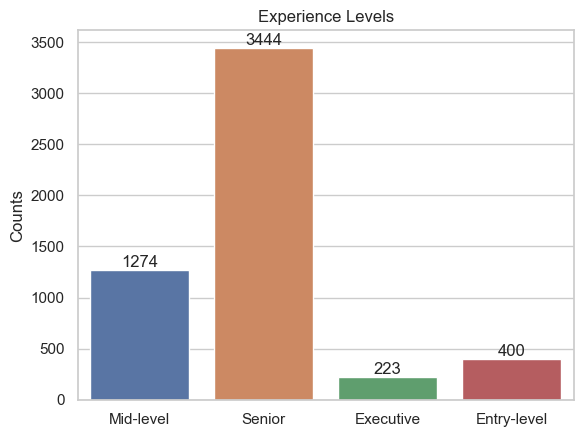

In [18]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.experience_level)
ax.set(xlabel='', ylabel='Counts', title='Experience Levels')
ax.bar_label(ax.containers[0])

As you can see, the senior-level positions have the highest count, followed by mid-level and junior positions. There are fewer director-level positions compared to other levels.

In [19]:
df['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

[Text(0, 0, '382'), Text(0, 0, '12'), Text(0, 0, '4'), Text(0, 0, '2')]

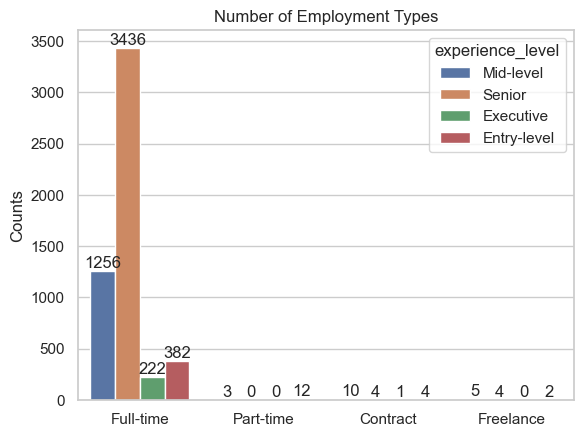

In [20]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')
ax.set(xlabel='', ylabel='Counts', title='Number of Employment Types')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

As you can see, a considerable number of people are employed here on a full-time basis. Among the full-time employees, the majority of them are senior. We observe that freelancing is less prevalent these days

[Text(2, 0, '399880'),
 Text(2, 0, '375000'),
 Text(2, 0, '300000'),
 Text(2, 0, '259000'),
 Text(2, 0, '258000'),
 Text(2, 0, '250000'),
 Text(2, 0, '233656'),
 Text(2, 0, '215448'),
 Text(2, 0, '212908'),
 Text(2, 0, '210875'),
 Text(2, 0, '201375'),
 Text(2, 0, '201000'),
 Text(2, 0, '198195'),
 Text(2, 0, '198057'),
 Text(2, 0, '194090')]

<Figure size 2500x900 with 0 Axes>

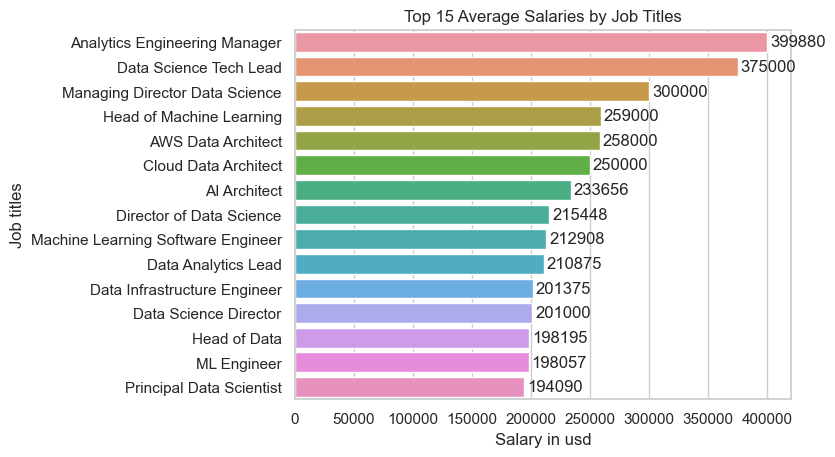

In [21]:
job_title_salary = df['salary_in_usd'].groupby(df['job_title']).mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles')
ax.bar_label(ax.containers[0], padding = 2)

[Text(0, 2, '152805'),
 Text(0, 2, '69820'),
 Text(0, 2, '105683'),
 Text(0, 2, '39250')]

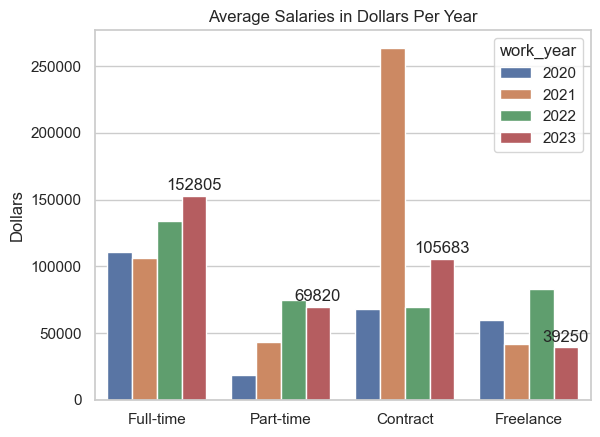

In [23]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

As you can see, average salaries for full-time have increased over the years. It shows that companies care about data science.




In [22]:
df.drop(columns=["employee_residence", "company_location"], inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [24]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,Senior,Full-time,In-person,M


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["job_title"] = le.fit_transform(df["job_title"])
df["job_category"] = le.fit_transform(df["job_category"])
df["experience_level"] = le.fit_transform(df["experience_level"])
df["employment_type"] = le.fit_transform(df["employment_type"])
df["work_setting"] = le.fit_transform(df["work_setting"])
df["salary_currency"] = le.fit_transform(df["salary_currency"])
df["company_size"] = le.fit_transform(df["company_size"])

In [26]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,42,4,5,88000,95012,2,2,0,0
1,2023,41,3,10,186000,186000,3,2,1,1
2,2023,41,3,10,81800,81800,3,2,1,1
3,2023,69,7,10,212000,212000,3,2,1,1
4,2023,69,7,10,93300,93300,3,2,1,1


In [27]:
X = df.drop(columns=["salary_currency", "salary", "salary_in_usd"])
y = df["salary_in_usd"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.1776685393258427
Testing Accuracy: 0.0037418147801683817


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
def classify_salary(salary):
    if salary <= 100000:
        return 'Low'
    elif salary <= 150000:
        return 'Medium'
    else:
        return 'High'

In [31]:
df['salary_class'] = df['salary_in_usd'].apply(classify_salary)


In [33]:
X = df.drop(columns=["salary_currency", "salary", "salary_in_usd", "salary_class"])
y = df["salary_class"]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
rf_clf = RandomForestClassifier(random_state=42)


In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')